Final C4SUE Individual Project
Data: Evictions from NYC Open Data 


# 1 
Describe the Data: 
- 
structure, data types and format 

In [196]:
## import pandas 
#runing packages 
import pandas as pd 
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt

from datetime import datetime
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point 
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon

## upload data
evictionsNYC = pd.read_csv('Evictions.csv')

ModuleNotFoundError: No module named 'geopandas'

In [174]:
evictionsNYC.shape

(66403, 20)

In [175]:
evictionsNYC.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,40492/17,337309,2130 TIEBOUT AVENUE,103/1ST FL,04/23/2018,Thomas,Bia,Residential,BRONX,10457,Not an Ejectment,Possession,40.853575,-73.898475,5.0,15.0,379.0,2013305.0,2.031430e+09,Mount Hope
1,K091444/17,388532,769 ST MARKS AVENUE,3-5E,03/12/2018,Richard,McCoy,Residential,BROOKLYN,11213,Not an Ejectment,Possession,40.675029,-73.946598,8.0,36.0,313.0,3030734.0,3.012210e+09,Crown Heights North
2,064158/18,86100,191-19 JAMAICA AVE,SECOND FLOOR LEFT,08/29/2018,Henry,Daley,Commercial,QUEENS,11423,Not an Ejectment,Possession,40.712604,-73.768501,12.0,23.0,482.0,4000000.0,4.104470e+09,Hollis
3,83867/16-2,6895,546 ISHAM STREET,22A,06/27/2017,George,"Essock, Jr.",Residential,MANHATTAN,10034,Not an Ejectment,Possession,40.866936,-73.919009,12.0,10.0,293.0,1064851.0,1.022270e+09,Marble Hill-Inwood
4,085641/18,91267,381 ESSEX STREET,2,09/04/2019,Henry,Daley,Residential,BROOKLYN,11208,Not an Ejectment,Possession,40.674648,-73.881858,5.0,37.0,1166.0,3088972.0,3.040040e+09,East New York


In [176]:
evictionsNYC['Executed Date']

0        04/23/2018
1        03/12/2018
2        08/29/2018
3        06/27/2017
4        09/04/2019
            ...    
66398    07/24/2017
66399    04/30/2019
66400    01/13/2017
66401    01/23/2019
66402    03/15/2019
Name: Executed Date, Length: 66403, dtype: object

In [177]:
evictionsNYC.dtypes

Court Index Number            object
Docket Number                  int64
Eviction Address              object
Eviction Apartment Number     object
Executed Date                 object
Marshal First Name            object
Marshal Last Name             object
Residential/Commercial        object
BOROUGH                       object
Eviction Postcode              int64
Ejectment                     object
Eviction/Legal Possession     object
Latitude                     float64
Longitude                    float64
Community Board              float64
Council District             float64
Census Tract                 float64
BIN                          float64
BBL                          float64
NTA                           object
dtype: object

In [178]:
evictionsNYC['Executed Date'] = pd.to_datetime(evictionsNYC['Executed Date'], format = "%m/%d/%Y")
evictionsNYC.tail()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
66398,79242/16,291349,162-18 108TH AVE,2,2017-07-24,George,Essock,Residential,QUEENS,11433,Not an Ejectment,Possession,40.696282,-73.791905,12.0,28.0,260.0,4216178.0,4.101500e+09,South Jamaica
66399,23176/18,15438,825 BOYNTON AVENUE,6E,2019-04-30,George,"Essock, Jr.",Residential,BRONX,10473,Not an Ejectment,Possession,40.820139,-73.876260,9.0,17.0,28.0,2092720.0,2.036230e+09,Soundview-Castle Hill-Clason Point-Harding Park
66400,71824/16,4158,2171 CLARENDON ROAD APARTMENT 3,3,2017-01-13,Robert,Renzulli,Residential,BROOKLYN,11226,Not an Ejectment,Possession,40.642722,-73.957264,14.0,40.0,792.0,3396547.0,3.051650e+09,Erasmus
66401,H252047/18,110518,2092-2094 FIFTH AVE,7B,2019-01-23,Darlene,Barone,Residential,MANHATTAN,10035,Not an Ejectment,Possession,40.808739,-73.940577,10.0,9.0,208.0,1053697.0,1.017260e+09,Central Harlem North-Polo Grounds
66402,20496/17,333810,234 EAST GUN HILL ROAD,4G,2019-03-15,Thomas,Bia,Residential,BRONX,10467,Not an Ejectment,Possession,40.880139,-73.876549,7.0,11.0,423.0,2018221.0,2.033430e+09,Norwood


# 2
Divide data into years

# How have evictions changed each year in the data? 
- evictions seem to be trending downards as each year has had less than the last. 

# Which year has the largest amount of evictions? 
-  2017

# Which one had the smallest?
- 2020; excluding 2021 as the data is incomplete 

Discuss your findings as compared to your assumtptions. 
- my assumtion was that due to the continuing influx of poeple moving into the city (or at least the trend of population density in NY pre-covid) would cause more and more people to be kicked out of their homes due to rising rent prices. Though this seems to not be the trend, it is the opposite. As the population increases less people are being evicted from their homes. 

In [179]:
## spliting data into years 
## ommiting 2021 data, 2020 data is skewed due to the COVID-19 pandemic 
evictions2017 = evictionsNYC[evictionsNYC['Executed Date'].dt.year==2017]
evictions2018 = evictionsNYC[evictionsNYC['Executed Date'].dt.year==2018]
evictions2019 = evictionsNYC[evictionsNYC['Executed Date'].dt.year==2019]
evictions2020 = evictionsNYC[evictionsNYC['Executed Date'].dt.year==2020]

print("Evictions in 2017: ", len(evictions2017))
print("Evictions in 2018: ", len(evictions2017))
print("Evictions in 2019: ", len(evictions2019))
print("Evictions in 2020: ", len(evictions2020))

Evictions in 2017:  22530
Evictions in 2018:  22530
Evictions in 2019:  18647
Evictions in 2020:  3387


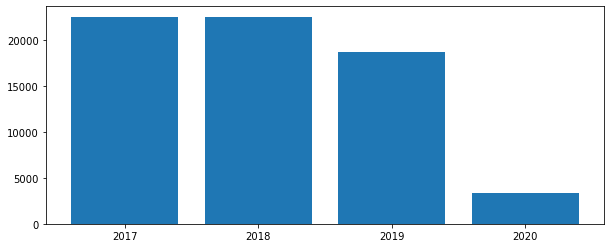

In [180]:
## visualizing each year to answer question 2 

plt.figure(figsize=(10,4))
ratio = [len(evictions2017), len(evictions2017), len(evictions2019), len(evictions2020)]
year = ['2017', '2018', '2019', '2020']
plt.bar(year, ratio)
plt.show()

# 3
# What is the ratio of commercial to residential evictions in the entire data? 

# Was this ratio constant over time? 
- calculate it seperatley per year 
- the ratio got smaller and smaller each year meaning that Residential and Commercial evictions are slowly trending towards an equilibrium between the two

# visualize 
the data for each year 
- discuss trends 
- As stated above as each year progresses the ratio between residential and commercial eviction are become less of a difference, though there are still a substaintial amount more of residential evictions as compared to commercial. This could be due to the fact that there are simply more residential space in use than commercial creating this disporia or perhaps that the problem with evictions lies within evictions amoung residents rather than businesses holding commerical real-estate. 

^^ maybe split this up into different cells for readability 

In [181]:
## Code for the above questions 
## calculate ratio's for each year's data 
## comparing commercial to residiential evictions 

evictionsNYC['Residential/Commercial'].value_counts()
res_tot = len(evictionsNYC[evictionsNYC['Residential/Commercial']=='Residential'])
com_tot = len(evictionsNYC[evictionsNYC['Residential/Commercial']=='Commercial'])
ratio_tot = (res_tot/com_tot)*100
print("Total Residential:Commercial Evictions: ", ratio_tot, '%')

Total Residential:Commercial Evictions:  1087.251922045414 %


In [182]:
evictions2017['Residential/Commercial'].value_counts()
res2017 = len(evictions2017[evictions2017['Residential/Commercial']=='Residential'])
com2017 = len(evictions2017[evictions2017['Residential/Commercial']=='Commercial'])
ratio2017 = (res2017/com2017)*100
print(ratio2017)

1209.8837209302326


In [183]:
evictions2018['Residential/Commercial'].value_counts()
res2018 = len(evictions2018[evictions2018['Residential/Commercial']=='Residential'])
com2018 = len(evictions2018[evictions2018['Residential/Commercial']=='Commercial'])
ratio2018 = (res2018/com2018)*100
print(ratio2018)

1085.1248642779587


In [184]:
evictions2019['Residential/Commercial'].value_counts()
res2019 = len(evictions2019[evictions2019['Residential/Commercial']=='Residential'])
com2019 = len(evictions2019[evictions2019['Residential/Commercial']=='Commercial'])
ratio2019 = (res2019/com2019)*100
print(ratio2019)

1015.2511961722489


In [185]:
evictions2020['Residential/Commercial'].value_counts()
res2020 = len(evictions2020[evictions2020['Residential/Commercial']=='Residential'])
com2020 = len(evictions2020[evictions2020['Residential/Commercial']=='Commercial'])
ratio2020 = (res2020/com2020)*100
print(ratio2020)

862.2159090909091


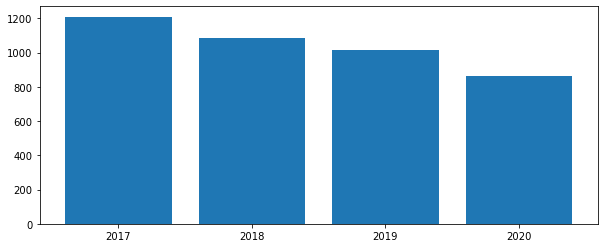

In [186]:
## visualize data
plt.figure(figsize=(10,4))
ratio = [ratio2017, ratio2018, ratio2019, ratio2020]
year = ['2017', '2018', '2019', '2020']
plt.bar(year, ratio)
plt.show()

# 4 
# What are the full names of the top 5 eviction marshalls? 
- denoted by who conduction the most evictions over time 

1. Justin Grossman
2. Henry Daley
3. Ileana Rivera
4. Thomas Bia
5. Edward Guida 

In [187]:
## code for the above questions 
evictionsNYC[['Marshal First Name', 'Marshal Last Name']].value_counts().head()

Marshal First Name  Marshal Last Name
Justin              Grossman             9173
Henry               Daley                6487
Ileana              Rivera               5842
Thomas              Bia                  5560
Edward              Guida                5422
dtype: int64

 # 5
 # How do the five buroughs compare overtime in terms of the number of evictions in each?
- dicusss the findings and compare them to the population of the buroughs 

- The Bronx overall has the most evicitions over all years 2017-2020
- In comparison to population (I used an average between 2017-2020 of each borough as they did not differ greatly) 
    - Queens 
    - Manhattan had the least which though I know that the apartments in this certain borough are more expensive therefore more wealthy people live there just due to its density and perhaps my one sided memory of the city is that I would assume they would have more frequencity of evicitions though I was inncorrect. 

In [188]:
## code for the above question 
evictionsNYC['BOROUGH'].value_counts()

BRONX            22053
BROOKLYN         18832
QUEENS           13177
MANHATTAN        10168
STATEN ISLAND     2173
Name: BOROUGH, dtype: int64

In [189]:
evictions2017['BOROUGH'].value_counts()

BRONX            7662
BROOKLYN         6357
QUEENS           4325
MANHATTAN        3452
STATEN ISLAND     734
Name: BOROUGH, dtype: int64

In [190]:
evictions2018['BOROUGH'].value_counts()

BRONX            7140
BROOKLYN         6157
QUEENS           4452
MANHATTAN        3390
STATEN ISLAND     691
Name: BOROUGH, dtype: int64

In [191]:
evictions2019['BOROUGH'].value_counts()

BRONX            6188
BROOKLYN         5312
QUEENS           3705
MANHATTAN        2806
STATEN ISLAND     636
Name: BOROUGH, dtype: int64

In [192]:
evictions2020['BOROUGH'].value_counts()

BRONX            1061
BROOKLYN         1003
QUEENS            693
MANHATTAN         518
STATEN ISLAND     112
Name: BOROUGH, dtype: int64

In [193]:
## comapred to the population in the buroughs 
bx_pop = []
bk_pop = []
q_pop = []
m_pop = [1654000, 1632000, 1632000, 8700000]
si_pop = []

## 2017

m = 1654000


## 2018

## 2019

## 2020

# 6

# Visualize the data as a cholorpleth map using NTA level
- the different shade represent the number of evictions in a particular NTA 

dicuss your findings: 


In [195]:
## upload packages 
import matplotlib
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point 
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
## Code for 6 
## upload NTA file 
nta = gpd.read_file('nynta.csv')
len(nta)

In [ ]:
nta.head()

In [ ]:
nta_name = []
evic_num = []

for i in range(len(nta.ntaname)):
    nta_name.append(nta.ntaname.iloc[i])
    
    evic_num.append(len(evictionsNYC[(evictionsNYC['NTA'] == nta_name[i])]))
    
tup = list(zip(nta_name, evic_num))
evic_per_nta = pd.DataFrame(tup, columns =('NTA', 'Evictions'))

nta['NTA'] = nta['ntaname']
nta = nta.merge(evic_per_nta, on='NTA')

nta.plot(column = 'Evictions', legend = True, figsize=(30,10), cmap='PuRd')
plt.axis('off')
plt.show()

With the visual it is obvious that there are certain NTA's with substantially more evictions than the rest 

these are seen in brooklyn, manhattan, and the bronx

this is suprising since i though that queens would at least be on the top three due to the fact that they are the most populated burough. 

# 7 
another socio-demographic attribute that may affect the number of evictions in a particular neighborhood? 
- look at data based on the attribute 
- visulaize side by side with evictions or in the same map 

# Attribute vs Evictions Ananlysis 


dicuss your findings and possible connections: 



In [ ]:
## code for 7 